In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
sys.path.append("/Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/internship/fraud-detection/codes/")
from utils import *

In [23]:
%cd "/Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/internship/fraud-detection/"

/Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/internship/fraud-detection


## 1. Question 1: Load data

In [34]:
pd00 = pd.read_json('./data/transactions.txt', lines=True)
pd00.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False


In [36]:
print(pd00.shape)

(786363, 29)


In [37]:
pd00.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [39]:
remove_cols = [] # columns will be removed for further exploration
numeric_cols = [] # numeric columns 
cat_cols = []  # categorical columns

for col in pd00.columns.tolist():
    print("Stats for column {}".format(col))
    data_type  = pd00[col].dtype
    num_unique = len(pd00[col].unique().tolist())
    num_null = pd00[col].isnull().sum()
    
    pct_val_list = pd00[col].value_counts(normalize=True) # percentage of each unique value in col
    
    if ( col!='isFraud' and np.max(pct_val_list) > 0.95) or (num_unique == 1):
        remove_cols.append(col) # also remove column when there is  either : have a value that occurs more than 95%
                                                                            # or have a single unique value
        
    
    if (num_unique < 100) & (col not in remove_cols):
        cat_cols.append(col) # append categorical column to the list
    
    
    print('data type = {}, num unique = {}, num null = {}'.format(data_type, num_unique, num_null))
    if is_numeric_dtype(pd00[col]):
        print('max = {}, min = {}'.format(pd00[col].max(), pd00[col].min()))
        if col not in remove_cols:
            numeric_cols.append(col)
    
    print('------------------------------------------------')

Stats for column accountNumber
data type = int64, num unique = 5000, num null = 0
max = 999389635, min = 100088067
------------------------------------------------
Stats for column customerId
data type = int64, num unique = 5000, num null = 0
max = 999389635, min = 100088067
------------------------------------------------
Stats for column creditLimit
data type = int64, num unique = 10, num null = 0
max = 50000, min = 250
------------------------------------------------
Stats for column availableMoney
data type = float64, num unique = 521915, num null = 0
max = 50000.0, min = -1005.63
------------------------------------------------
Stats for column transactionDateTime
data type = object, num unique = 776637, num null = 0
------------------------------------------------
Stats for column transactionAmount
data type = float64, num unique = 66038, num null = 0
max = 2011.54, min = 0.0
------------------------------------------------
Stats for column merchantName
data type = object, num un

In [40]:
print("List of removed columns = {}".format(remove_cols))
print("--------")
print("List of categorical columns = {}".format(cat_cols))
print("--------")
print("List of numeric columns = {}".format(numeric_cols))

List of removed columns = ['acqCountry', 'merchantCountryCode', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch']
--------
List of categorical columns = ['creditLimit', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType', 'cardPresent', 'isFraud']
--------
List of numeric columns = ['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance', 'cardPresent', 'isFraud']


In [41]:
used_cols = [col for col in pd00.columns.tolist() if col not in remove_cols]
pd00 = pd00[used_cols]
print(pd00.shape)

(786363, 20)


## Question 2. Plot and Visualization 

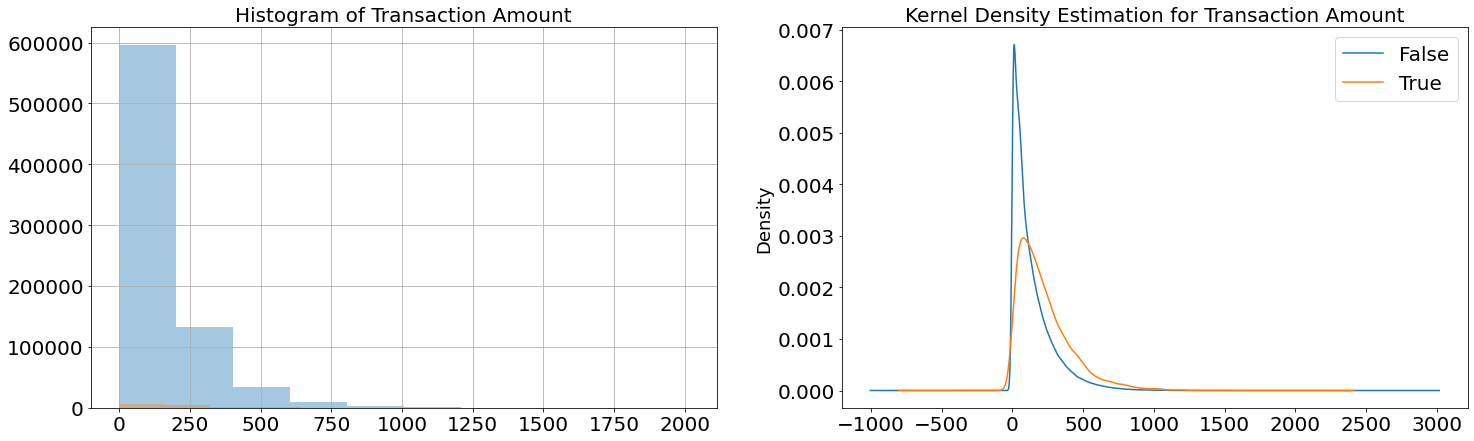

In [54]:

fig, axs = plt.subplots(figsize = (15, 7), ncols=2)

pd00.groupby("isFraud").transactionAmount.plot(kind='kde', ax=axs[1])
#pd00.groupby("isFraud").transactionAmount.hist(alpha=0.4, ax=axs[0],label='yes')
#axs[0].hist(pd00[pd00['isFraud']==1][''])
for i in range(2):
    axs[i].tick_params(axis="x", labelsize=20)
    axs[i].tick_params(axis="y", labelsize=20)
    #axs[i].legend(fontsize = 20)
axs[0].set_title('Histogram of Transaction Amount',fontsize= 20)
axs[1].set_title('Kernel Density Estimation for Transaction Amount', fontsize= 20)
#axs[0].set_yscale('log')
axs[1].set_ylabel('Density', fontsize = 18)
plt.legend(fontsize = 20)
plt.subplots_adjust(right=1.4)
plt.show()

# The PLOT shows that a positive correlation between transaction amount with label Fraud
# i.e The higher the transaction amount, the more likely it is a fraud transaction !


In [56]:
# Correlation between some numeric  columns

pd00[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance', 'isFraud']].corr('spearman')

,creditLimit,availableMoney,transactionAmount,currentBalance,isFraud
creditLimit,1.000000,0.829725,0.003322,0.575515,0.002128
availableMoney,0.829725,1.000000,-0.019091,0.145357,-0.000744
transactionAmount,0.003322,-0.019091,1.000000,0.049542,0.073716
currentBalance,0.575515,0.145357,0.049542,1.000000,0.008093
isFraud,0.002128,-0.000744,0.073716,0.008093,1.000000
